In [62]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [63]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

In [64]:
tickers = tickers.Symbol.to_list()

In [65]:
tickers = [i.replace('.', '-') for i in tickers]

In [66]:
def RSIcalc(asset):
    df = yf.download(asset, start = '2011-01-01')
    df['MA200'] = df['Adj Close'].rolling(window = 200).mean()
    df['price change'] = df['Adj Close'].pct_change()
    df['Upmove'] = df['price change'].apply(lambda x: x if x > 0 else 0)
    df['Downmove'] = df['price change'].apply(lambda x: abs(x) if x < 0 else 0)
    df['avg Up'] = df['Upmove'].ewm(span = 19).mean()
    df['avg Down'] = df['Downmove'].ewm(span = 19).mean()
    
    df = df.dropna()
    
    df['RS'] = df['avg Up']/df['avg Down']
    df['RSI'] = df['RS'].apply(lambda x: 100 - (100/(x + 1)))
    
    df.loc[(df['Adj Close'] > df['MA200']) & (df['RSI'] < 30), 'Buy'] = 'Yes'
    df.loc[(df['Adj Close'] < df['MA200']) | (df['RSI'] > 30), 'Buy'] = 'No'
    return df

In [67]:
def getSignals(df):
    Buying_dates = []
    Selling_dates = []
    
    for i in range(len(df) - 11):
        if 'Yes' in df['Buy'].iloc[i]:
            Buying_dates.append(df.iloc[i + 1].name)
            
            for j in range(1, 11):
                if df['RSI'].iloc[i + j] > 40:
                    Selling_dates.append(df.iloc[i + j + 1].name)
                    break
                    
                elif j == 10:
                    Selling_dates.append(df.iloc[i + j + 1].name)
    return Buying_dates, Selling_dates

In [68]:
frame = RSIcalc(tickers[0])
buy, sell = getSignals(frame)

[*********************100%***********************]  1 of 1 completed


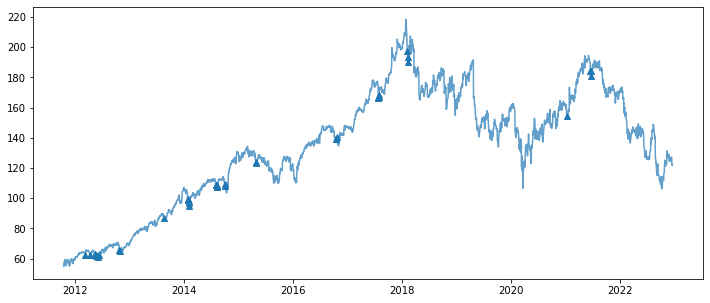

In [69]:
plt.figure(figsize = (12, 5))
plt.scatter(frame.loc[buy].index, frame.loc[buy]['Adj Close'], marker = '^')
plt.plot(frame['Adj Close'], alpha = 0.7)

In [70]:
Profits = (frame.loc[sell].Open.values - frame.loc[buy].Open.values)/frame.loc[buy].Open.values

In [71]:
Profits

array([ 0.01841858,  0.01323802, -0.0115183 , -0.01105814,  0.00212315,
        0.01287556,  0.03632401,  0.02847867,  0.01033357,  0.01558087,
        0.01012236, -0.00346098,  0.00108178, -0.00407378,  0.02345979,
        0.01052883,  0.02759942,  0.00556546,  0.00556546,  0.01286469,
        0.0062834 ,  0.01170129,  0.01861865,  0.01306246,  0.0130085 ,
        0.01320242, -0.00076654,  0.00355307, -0.01841872,  0.01366927,
        0.02033747,  0.01195283,  0.01595001,  0.00852711,  0.02154845,
        0.00861573,  0.01892706, -0.0052846 ,  0.01409035,  0.01120925])

In [72]:
wins = [i for i in Profits if i > 0]
wr = len(wins)/len(Profits)
wr

0.825

In [73]:
matrixsignals = []
matrixprofits = []

for i in range(len(tickers)):
    frame = RSIcalc(tickers[i])
    buy, sell = getSignals(frame)
    Profits = (frame.loc[sell].Open.values - frame.loc[buy].Open.values)/frame.loc[buy].Open.values
    matrixsignals.append(buy)
    matrixprofits.append(Profits)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [81]:
allprofit = []

for i in matrixprofits:
    for e in i:
        allprofit.append(e)

In [82]:
wins = [i for i in allprofit if i > 0]
wr = len(wins)/len(allprofit)

In [83]:
wr

0.7101554635946762

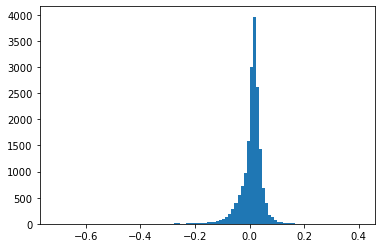

In [85]:
plt.hist(allprofit, bins = 100)
plt.show()

In [86]:
for i in matrixsignals:
    for e in i:
        if e.year == 2021:
            print(e)

2021-01-12 00:00:00
2021-06-17 00:00:00
2021-06-18 00:00:00
2021-06-21 00:00:00
2021-09-15 00:00:00
2021-09-16 00:00:00
2021-09-17 00:00:00
2021-09-20 00:00:00
2021-09-28 00:00:00
2021-09-29 00:00:00
2021-09-30 00:00:00
2021-10-01 00:00:00
2021-09-03 00:00:00
2021-09-07 00:00:00
2021-09-08 00:00:00
2021-03-05 00:00:00
2021-03-09 00:00:00
2021-09-29 00:00:00
2021-09-30 00:00:00
2021-10-01 00:00:00
2021-10-04 00:00:00
2021-05-05 00:00:00
2021-06-17 00:00:00
2021-06-18 00:00:00
2021-06-21 00:00:00
2021-06-22 00:00:00
2021-06-23 00:00:00
2021-06-24 00:00:00
2021-06-28 00:00:00
2021-06-29 00:00:00
2021-06-30 00:00:00
2021-07-01 00:00:00
2021-07-02 00:00:00
2021-07-06 00:00:00
2021-07-07 00:00:00
2021-07-08 00:00:00
2021-07-09 00:00:00
2021-07-15 00:00:00
2021-07-19 00:00:00
2021-07-20 00:00:00
2021-07-23 00:00:00
2021-09-28 00:00:00
2021-09-29 00:00:00
2021-09-30 00:00:00
2021-10-01 00:00:00
2021-10-04 00:00:00
2021-10-05 00:00:00
2021-10-06 00:00:00
2021-10-07 00:00:00
2021-01-15 00:00:00
